# Plot Response of Residual Circulation and Changes in Adiabatic Heating in the UTLS region

In [1]:
import sys, os, glob
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [2]:
import pylab as plt
import seaborn as sns
import importlib

sns.set_context('talk')

colors = plt.rcParamsDefault["axes.prop_cycle"].by_key()["color"]
ora = colors.pop(1)
colors.insert(2, ora)

myPara = {'figure.figsize': (14,7), 'lines.linewidth': 3, 'legend.frameon' : False,
          'axes.spines.right': False,
          'axes.spines.top': False,
          'axes.titleweight': 'bold',
          "axes.prop_cycle": plt.cycler(color=colors)
         }
                            
plt.rcParams.update( myPara )



## Open Data

In [3]:
sys.path.append('../tools')

import importlib
import reader, plot, analysis
importlib.reload( reader )
importlib.reload( plot )
importlib.reload( analysis )

<module 'analysis' from '/home/b/b380352/pub/2022-11_WiFi-AUS_Circ-Feedbacks/nbooks/../tools/analysis.py'>

In [4]:
output_dir = '/work/bb1262/work_archive/bm0834/data/wifi-aus/statistics/'

dset = xr.open_dataset( f'{output_dir}/circulation-vars-by-latitude-and pressure.nc',)

switch hPa from pressure coordinate

In [5]:
dset['plev'] = dset.plev * 1e-2
dset['plev'].attrs['units'] = 'hPa'
dset['plev'].attrs['long_name'] = 'pressure'

## Plotting 

In [6]:
clevs = plot.set_levs(1,3)

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


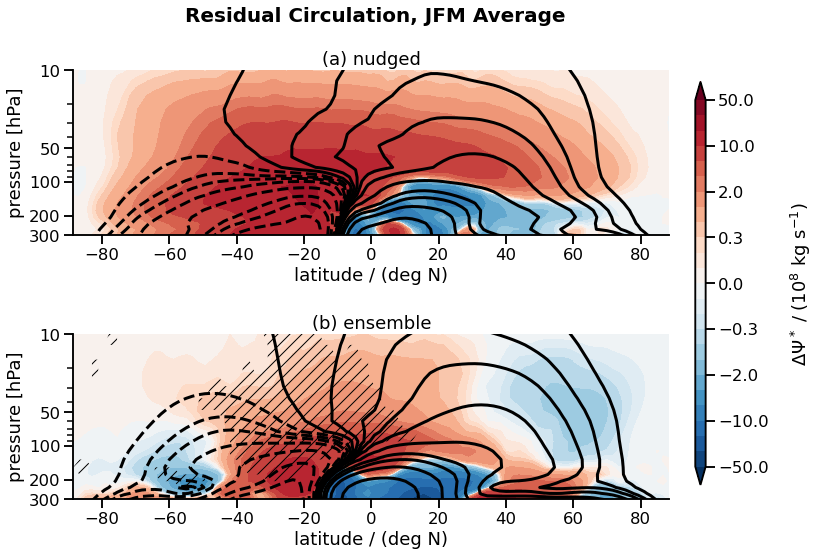

In [7]:
ano_scale = 1e8
mean_scale = 1e10

kws = dict(  x = 'lat', y = 'plev', yincrease = False, yscale = 'log', ylim = (300., 10.), add_colorbar = False,
                                                          levels = clevs)

#fig, axs = plt.subplots( ncols = 2, figsize = (14,6), sharey = True)
#plt.subplots_adjust(right = 0.88, left = 0.15, top = 0.8)

fig, axs = plt.subplots( nrows = 2, figsize = (12,8), sharey = True)
plt.subplots_adjust(right = 0.84, left = 0.15, top = 0.87, hspace = 0.6)

plt.suptitle('Residual Circulation, JFM Average', fontsize = 20, fontweight = 'bold')

month = '2020-03'
mode = 'fire1.0'
din = dset.mean('time')
dstat = analysis.stats_and_nudged( din )


a = axs[0]
diff = dstat['psi_TEM'].sel( mode = mode, stats = 'nudged',).squeeze()  / ano_scale
mean = din['psi_TEM'].sel( mode = mode, ensemble = 'nudged',).squeeze() / mean_scale

diff.plot.contourf(  ax = a, **kws )
a.set_facecolor('grey')

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(a) nudged',  fontweight = 'normal')

a = axs[1]

diff = dstat['psi_TEM'].sel( mode = mode, stats = 'mean',).squeeze() / ano_scale
mean = dstat['psi_TEM'].sel( mode = mode, stats = 'reference',).squeeze() / mean_scale
conf = dstat['psi_TEM'].sel( mode = mode, stats = 'confidence')  / ano_scale

sigma = np.abs( diff / conf )


cplot = diff.plot.contourf(   ax = a, **kws )
a.set_facecolor('grey')

sigma.where(sigma > 1).plot.contourf(  x = 'lat', y = 'plev',
            ax = a,
            levels = [0, 1000],
            add_colorbar = False,
            colors='none',  yincrease = False, yscale = 'log', ylim = (300e2, 10e2), 
            hatches = ['//'])

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(b) ensemble', fontweight = 'normal')


for i, a in enumerate(axs):
    plt.sca(a)
    a.set_yticks([10, 50, 100, 200, 300], )
    a.set_yticklabels([10, 50, 100, 200, 300], )
    a.set_xlabel('latitude / (deg N)')
    a.set_ylim(300, 10)
    #if i == 1:
    #    a.set_ylabel('')
    
axc = fig.add_axes( [0.87, 0.15, 0.012, 0.7] ) 
cbar = plt.colorbar(cplot, axc)

#cbar.ax.get_yaxis().set_ticks([-50, -10, -1, 0, 1, 10, 50],[-50, -10, -1, 0, 1, 10, 50],)
cbar.ax.set_ylabel('$\Delta \Psi^*$ / ($10^8$ kg s${}^{-1}$)', labelpad = 20)
plt.savefig('../pics/residual-circulation.png', dpi = 600)

## Heating

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


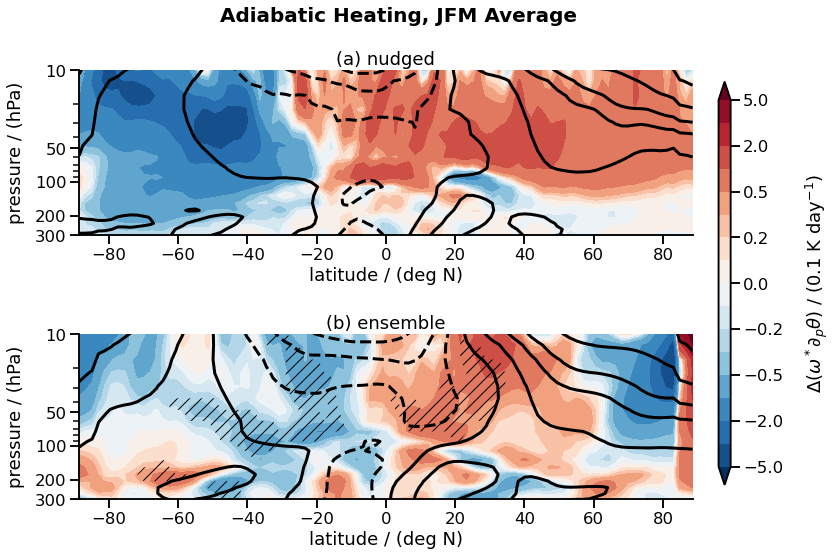

In [8]:
ano_scale = 1e-1 / analysis.day
mean_scale = 100 * ano_scale
vname = 'diabatic_heating'
offset = 4

kws = dict(  x = 'lat', y = 'plev', yincrease = False, yscale = 'log', ylim = (300., 10.), add_colorbar = False,
                                                          levels = clevs[offset:-offset])

#fig, axs = plt.subplots( ncols = 2, figsize = (14,6), sharey = True)
#plt.subplots_adjust(right = 0.88, left = 0.15, top = 0.8)


fig, axs = plt.subplots( nrows = 2, figsize = (12,8), sharey = True)
plt.subplots_adjust(right = 0.84, left = 0.13, top = 0.87, hspace = 0.6)
plt.suptitle('Adiabatic Heating, JFM Average', fontsize = 20, fontweight = 'bold')

#month = '2020-03'
mode = 'fire1.0'
din = dset.mean('time').rolling(lat = 5, center = True, min_periods = 1).mean()
dstat = analysis.stats_and_nudged( din )


a = axs[0]
diff = dstat[vname].sel( mode = mode, stats = 'nudged',).squeeze()  / ano_scale
mean = din[vname].sel( mode = mode, ensemble = 'nudged',).squeeze() / mean_scale

diff.plot.contourf(  ax = a, **kws )
a.set_facecolor('grey')

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(a) nudged',  fontweight = 'normal')




a = axs[1]

diff = dstat[vname].sel( mode = mode, stats = 'mean',).squeeze() / ano_scale
mean = dstat[vname].sel( mode = mode, stats = 'reference',).squeeze() / mean_scale
conf = dstat[vname].sel( mode = mode, stats = 'confidence')  / ano_scale

sigma = np.abs( diff / conf )


cplot = diff.plot.contourf(   ax = a, **kws )
a.set_facecolor('grey')

sigma.where(sigma > 1).plot.contourf(  x = 'lat', y = 'plev',
            ax = a,
            levels = [0, 1000],
            add_colorbar = False,
            colors='none',  yincrease = False, yscale = 'log', ylim = (300e2, 10e2), 
            hatches = ['//'])

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(b) ensemble', fontweight = 'normal')



for i, a in enumerate(axs):
    plt.sca(a)
    a.set_yticks([10, 50, 100, 200, 300], )
    a.set_yticklabels([10, 50, 100, 200, 300], )
    a.set_xlabel('latitude / (deg N)')
    a.set_ylabel('pressure / (hPa)', labelpad = 10)
    a.set_ylim(300, 10)
    #if i == 1:
    #    a.set_ylabel('')
    
axc = fig.add_axes( [0.87, 0.15, 0.014, 0.7] ) 
cbar = plt.colorbar(cplot, axc)

#clabels = [ -10, -1, 0, 1, 10]
#cbar.ax.get_yaxis().set_ticks(clabels,)#clabels)
cbar.ax.set_ylabel(r'$\Delta( \omega^* \partial_p \theta )$ / (0.1 K day${}^{-1}$)', labelpad = 20)
plt.savefig('../pics/adiabatic-heating.png', dpi = 600)

## Plots for Supplement

### Average Streamfunction 

In [9]:
psiL_jan = dset['psi_TEM'].sel ( time = '2020-01').squeeze()
psiE_jan = dset['psi_Eulerian'].sel ( time = '2020-01').squeeze()

In [10]:
clevs = plot.set_levs(11,3)

Text(0.5, 1.0, '(b) TEM Streamfunction')

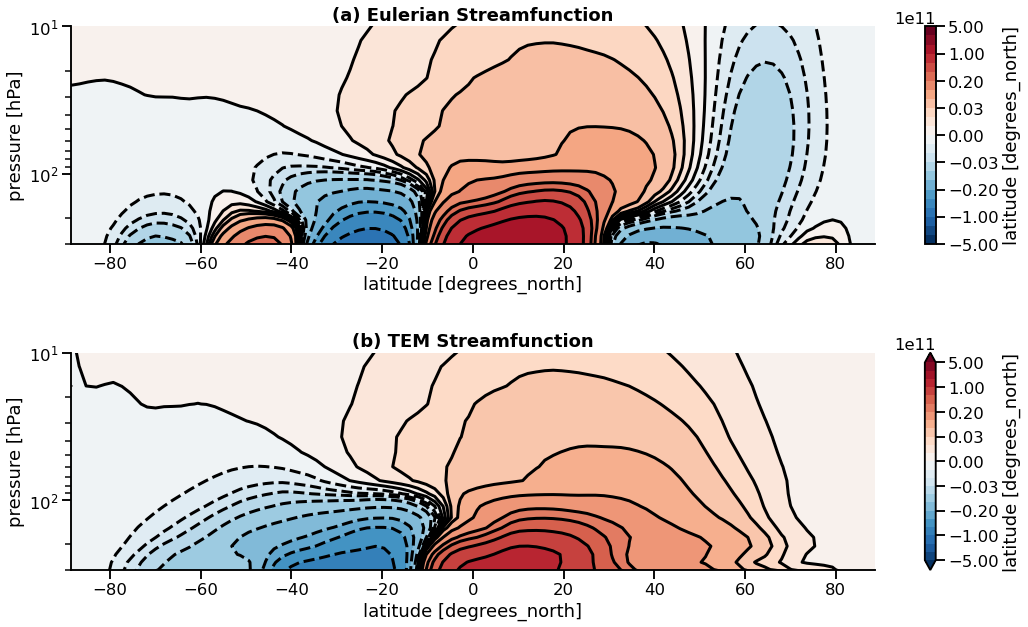

In [11]:
kws = dict( yincrease = False, yscale = 'log', ylim = (300., 10.),  
                                                          levels = clevs)

fig, axs = plt.subplots( nrows = 2, figsize = (18,10))
plt.subplots_adjust( hspace = 0.5)
    
a = axs[0]
pvar = psiE_jan.sel( mode = 'fire0.0', ensemble = 'nudged').squeeze()
pvar.plot.contourf(  x = 'lat', y = 'plev',  ax = a, **kws )
a.set_facecolor('grey')

pvar.plot.contour(  x = 'lat', y = 'plev', colors = 'k', ax = a, **kws)
a.set_title('(a) Eulerian Streamfunction')

a = axs[1]
pvar = psiL_jan.sel( mode = 'fire0.0', ensemble = 'nudged').squeeze()
pvar.plot.contourf(  x = 'lat', y = 'plev',  ax = a, **kws )
a.set_facecolor('grey')

pvar.plot.contour(  x = 'lat', y = 'plev', colors = 'k', ax = a, **kws)
a.set_title('(b) TEM Streamfunction')


## Vertical Motion

In [14]:
clevs = plot.set_levs(1,3)

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0, 0.5, '$\\Delta\\omega^*$ / (Pa day${}^{-1}$)')

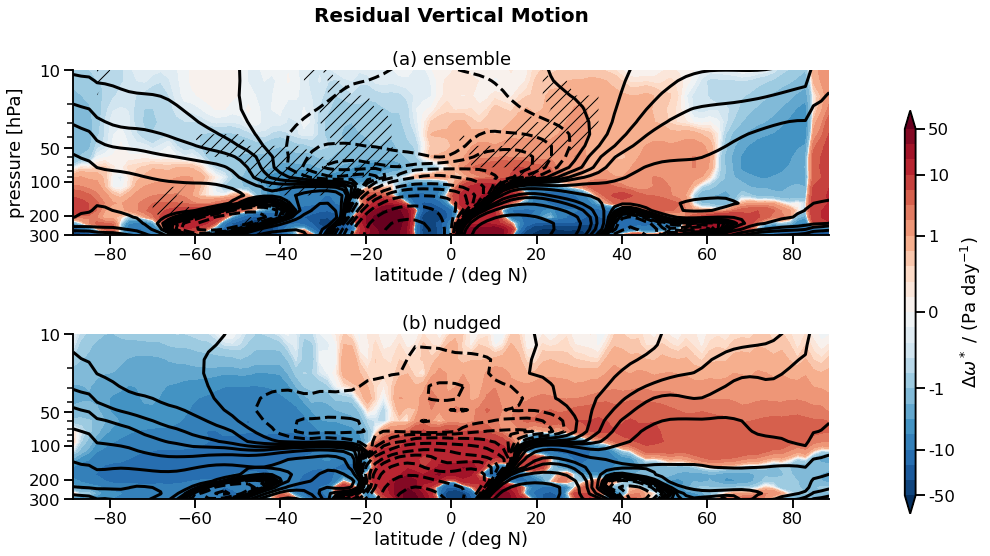

In [15]:
ano_scale = 1 / analysis.day
mean_scale = 100 * ano_scale
vname = 'omega_star'

kws = dict(  x = 'lat', y = 'plev', yincrease = False, yscale = 'log', ylim = (300., 10.), add_colorbar = False,
                                                          levels = clevs)

#fig, axs = plt.subplots( ncols = 2, figsize = (14,6), sharey = True)
#plt.subplots_adjust(right = 0.88, left = 0.15, top = 0.8)


fig, axs = plt.subplots( nrows = 2, figsize = (15,8), sharey = True)
plt.subplots_adjust(right = 0.85, left = 0.15, top = 0.87, hspace = 0.6)
plt.suptitle('Residual Vertical Motion', fontsize = 20, fontweight = 'bold')

#month = '2020-03'
mode = 'fire1.0'
din = dset.mean('time').rolling(lat = 5, center = True, min_periods = 1).mean()
dstat = analysis.stats_and_nudged( din )


diff = dstat[vname].sel( mode = mode, stats = 'mean',).squeeze() / ano_scale
mean = dstat[vname].sel( mode = mode, stats = 'reference',).squeeze() / mean_scale
conf = dstat[vname].sel( mode = mode, stats = 'confidence')  / ano_scale

sigma = np.abs( diff / conf )

a = axs[0]
cplot = diff.plot.contourf(   ax = a, **kws )
a.set_facecolor('grey')

sigma.where(sigma > 1).plot.contourf(  x = 'lat', y = 'plev',
            ax = a,
            levels = [0, 1000],
            add_colorbar = False,
            colors='none',  yincrease = False, yscale = 'log', ylim = (300e2, 10e2), 
            hatches = ['//'])

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(a) ensemble', fontweight = 'normal')


a = axs[1]
diff = dstat[vname].sel( mode = mode, stats = 'nudged',).squeeze()  / ano_scale
mean = din[vname].sel( mode = mode, ensemble = 'nudged',).squeeze() / mean_scale

diff.plot.contourf(  ax = a, **kws )
a.set_facecolor('grey')

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(b) nudged',  fontweight = 'normal')


for i, a in enumerate(axs):
    plt.sca(a)
    a.set_yticks([10, 50, 100, 200, 300], )
    a.set_yticklabels([10, 50, 100, 200, 300], )
    a.set_xlabel('latitude / (deg N)')
    a.set_ylim(300, 10)
    if i == 1:
        a.set_ylabel('')
    
axc = fig.add_axes( [0.92, 0.1, 0.01, 0.7] ) 
cbar = plt.colorbar(cplot, axc)

cbar.ax.get_yaxis().set_ticks([-50, -10, -1, 0, 1, 10, 50],[-50, -10, -1, 0, 1, 10, 50],)
cbar.ax.set_ylabel(r'$\Delta\omega^*$ / (Pa day${}^{-1}$)', )


## Meridional Motion

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0, 0.5, '$\\Delta v^*$ / (cm s${}^{-1}$)')

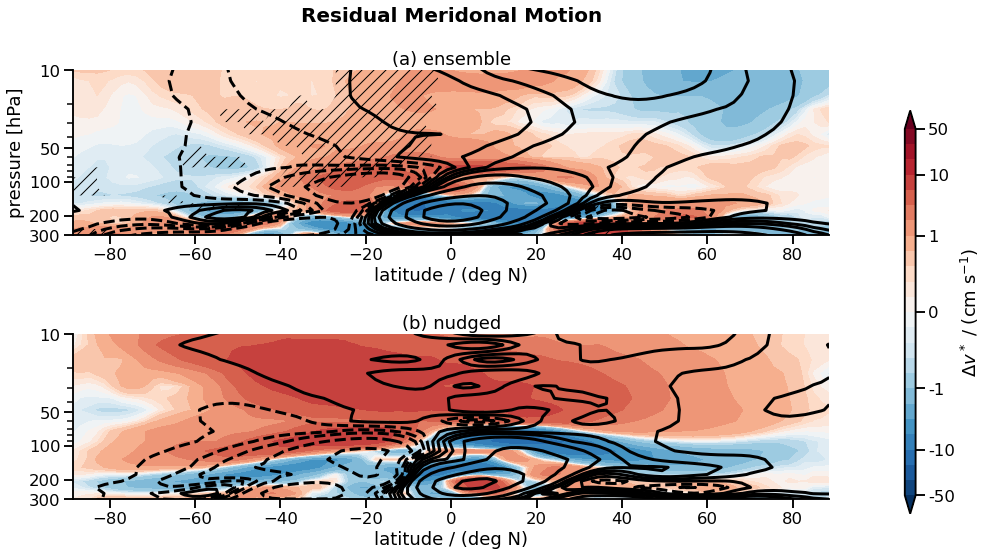

In [16]:
ano_scale = 0.01
mean_scale = 100 * ano_scale
vname = 'v_star'

kws = dict(  x = 'lat', y = 'plev', yincrease = False, yscale = 'log', ylim = (300., 10.), add_colorbar = False,
                                                          levels = clevs)

#fig, axs = plt.subplots( ncols = 2, figsize = (14,6), sharey = True)
#plt.subplots_adjust(right = 0.88, left = 0.15, top = 0.8)


fig, axs = plt.subplots( nrows = 2, figsize = (15,8), sharey = True)
plt.subplots_adjust(right = 0.85, left = 0.15, top = 0.87, hspace = 0.6)
plt.suptitle('Residual Meridonal Motion', fontsize = 20, fontweight = 'bold')

#month = '2020-03'
mode = 'fire1.0'
din = dset.mean('time').rolling(lat = 5, center = True, min_periods = 1).mean()
dstat = analysis.stats_and_nudged( din )


diff = dstat[vname].sel( mode = mode, stats = 'mean',).squeeze() / ano_scale
mean = dstat[vname].sel( mode = mode, stats = 'reference',).squeeze() / mean_scale
conf = dstat[vname].sel( mode = mode, stats = 'confidence')  / ano_scale

sigma = np.abs( diff / conf )

a = axs[0]
cplot = diff.plot.contourf(   ax = a, **kws )
a.set_facecolor('grey')

sigma.where(sigma > 1).plot.contourf(  x = 'lat', y = 'plev',
            ax = a,
            levels = [0, 1000],
            add_colorbar = False,
            colors='none',  yincrease = False, yscale = 'log', ylim = (300e2, 10e2), 
            hatches = ['//'])

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(a) ensemble', fontweight = 'normal')


a = axs[1]
diff = dstat[vname].sel( mode = mode, stats = 'nudged',).squeeze()  / ano_scale
mean = din[vname].sel( mode = mode, ensemble = 'nudged',).squeeze() / mean_scale

diff.plot.contourf(  ax = a, **kws )
a.set_facecolor('grey')

mean.plot.contour(  colors = 'k', ax = a, **kws)
a.set_title('(b) nudged',  fontweight = 'normal')


for i, a in enumerate(axs):
    plt.sca(a)
    a.set_yticks([10, 50, 100, 200, 300], )
    a.set_yticklabels([10, 50, 100, 200, 300], )
    a.set_xlabel('latitude / (deg N)')
    a.set_ylim(300, 10)
    if i == 1:
        a.set_ylabel('')
    
axc = fig.add_axes( [0.92, 0.1, 0.01, 0.7] ) 
cbar = plt.colorbar(cplot, axc)

cbar.ax.get_yaxis().set_ticks([-50, -10, -1, 0, 1, 10, 50],[-50, -10, -1, 0, 1, 10, 50],)
cbar.ax.set_ylabel(r'$\Delta v^*$ / (cm s${}^{-1}$)', )
